In [ ]:
%reload_ext autoreload
%autoreload 2

import sys
from tqdm import tqdm
import h5py
import numpy as np

sys.path.append("..")
import axionmirror.units_constants as uc

from config import pc_dict

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file('../matplotlibrc')

## Graveyard samples

In [ ]:
from config import wdir

In [ ]:
zs = np.load(f'{wdir}/CHIME-nnu10-nra1-ndec1/snr-graveyard/snr-graveyard-inu6-ira0-idec0.npy')

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:04<00:00,  7.43it/s]


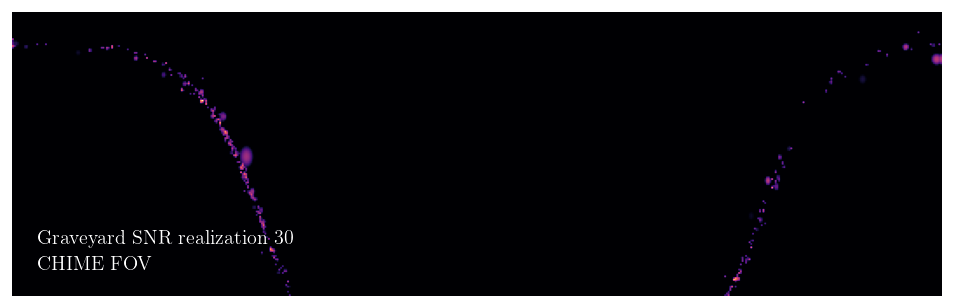

In [ ]:
n_show = 30

for i in tqdm(range(n_show)):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.imshow(np.flipud(np.log10(np.clip(zs[i], 1e-9, None))),
              extent=(180, -180, -20, 90), vmin=-9, vmax=-4, cmap='magma')
    ax.axis('off')
    ax.text(170, -0, f'Graveyard SNR realization {i+1}', color='white', fontsize=12)
    ax.text(170, -10, 'CHIME FOV', color='white', fontsize=12)
    fig.savefig(f"../outputs/plot_graveyard_samples/{i}.png", pad_inches=0.)
    if i != n_show-1:
        plt.close()

In [ ]:
from PIL import Image

def create_gif_from_pngs(png_dir, n_png, output_path):
    images = []
    for i in range(n_png):
        image = Image.open(f'{png_dir}/{i}.png')
        images.append(image)
    images[0].save(output_path, save_all=True, append_images=images[1:], optimize=False, duration=200, loop=0)

create_gif_from_pngs('../outputs/plot_graveyard_samples', n_show, '../outputs/graveyard_samples.gif')

## Pixelization

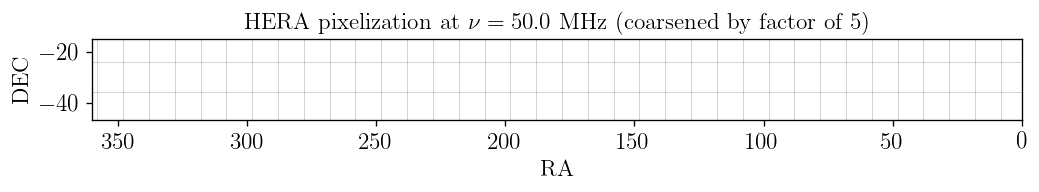

In [ ]:
pc = pc_dict['HERA']
pc.build(0, 0, 0)

fig, ax = plt.subplots(figsize=(10, 5))
for dec in pc.dec_edges[::5]:
    ax.axhline(np.rad2deg(dec), color='k', alpha=0.2, linewidth=0.5)
for ra in pc.ra_edges[::5]:
    ax.axvline(np.rad2deg(ra), color='k', alpha=0.2, linewidth=0.5)
ax.set(xlim=(360, 0), ylim=(np.rad2deg(pc.telescope.survey_dec_min(pc.nu)), np.rad2deg(pc.telescope.survey_dec_max(pc.nu))), aspect=1)
ax.set(xlabel='RA', ylabel='DEC', title=pc.telescope.name + rf' pixelization at $\nu={pc.nu:.1f}$~MHz (coarsened by factor of 5)')
fig.savefig(f'../outputs/{pc.telescope.name}_pixels.pdf', bbox_inches='tight')